# Caso de An√°lisis: Tasa de Crimen

El archivo crimen.txt contiene informaci√≥n sobre tasas de crimen y algunas variables demogr√°ficas de 47 estados de Estados Unidos

Se solicita construir un modelo de regresi√≥n para predecir la tasa de crimen.

# **1. Importar Librer√≠as**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

from sklearn.preprocessing import StandardScaler

Se definen algunas funciones de utilidad

In [2]:
def correlation_heatmap(df):
    """Funci√≥n para plotear las correlaciones de las variables de un dataset"""
    
    _ , ax = plt.subplots(figsize =(10, 6))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        fmt='.2f',
        linewidths=0.1,
        vmax=1.0,
        vmin=-1.0, 
        linecolor='white',
        annot_kws={'fontsize':8}
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=12)
    plt.show()

# **2.Cargar datos**

In [3]:
url_data='data/'
dfCrimen = pd.read_csv(url_data+'crimen.txt', delimiter='\t')
dfCrimen.head(5)

M  So    Ed   Po1   Po2     LF    M.F  Pop    NW     U1   U2  Wealth  Ineq      Prob     Time  Crime
0  15.1   1   9.1   5.8   5.6  0.510   95.0   33  30.1  0.108  4.1    3940  26.1  0.084602  26.2011    791
1  14.3   0  11.3  10.3   9.5  0.583  101.2   13  10.2  0.096  3.6    5570  19.4  0.029599  25.2999   1635
2  14.2   1   8.9   4.5   4.4  0.533   96.9   18  21.9  0.094  3.3    3180  25.0  0.083401  24.3006    578
3  13.6   0  12.1  14.9  14.1  0.577   99.4  157   8.0  0.102  3.9    6730  16.7  0.015801  29.9012   1969
4  14.1   0  12.1  10.9  10.1  0.591   98.5   18   3.0  0.091  2.0    5780  17.4  0.041399  21.2998   1234

# **3. Entendimiento de los datos**

Se tienen 15 variables predictoras num√©ricas.

In [4]:
dfCrimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 6.0 KB


47 filas con 16 columnas.

In [5]:
dfCrimen.shape

(47, 16)

Se dividen de una buena vez las variables predictoras del target a fin de realizar distintos tipos de procedimientos con cada una de estas variables

In [6]:
X = dfCrimen.drop(columns=['Crime'])
y = dfCrimen['Crime']

# **4. EDA**

Se realiza un EDA puntual a modo de entender las variables y su relaci√≥n con el target. Se hace uso de:
- Diagrama de Dispersi√≥n
- Diagrama de correlaci√≥n

## **4.1 Diagrama de dispersi√≥n** 

In [7]:
dfEDA = dfCrimen.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dfEDA[X.columns] = X_scaled

dfEDA['Crime'] = y


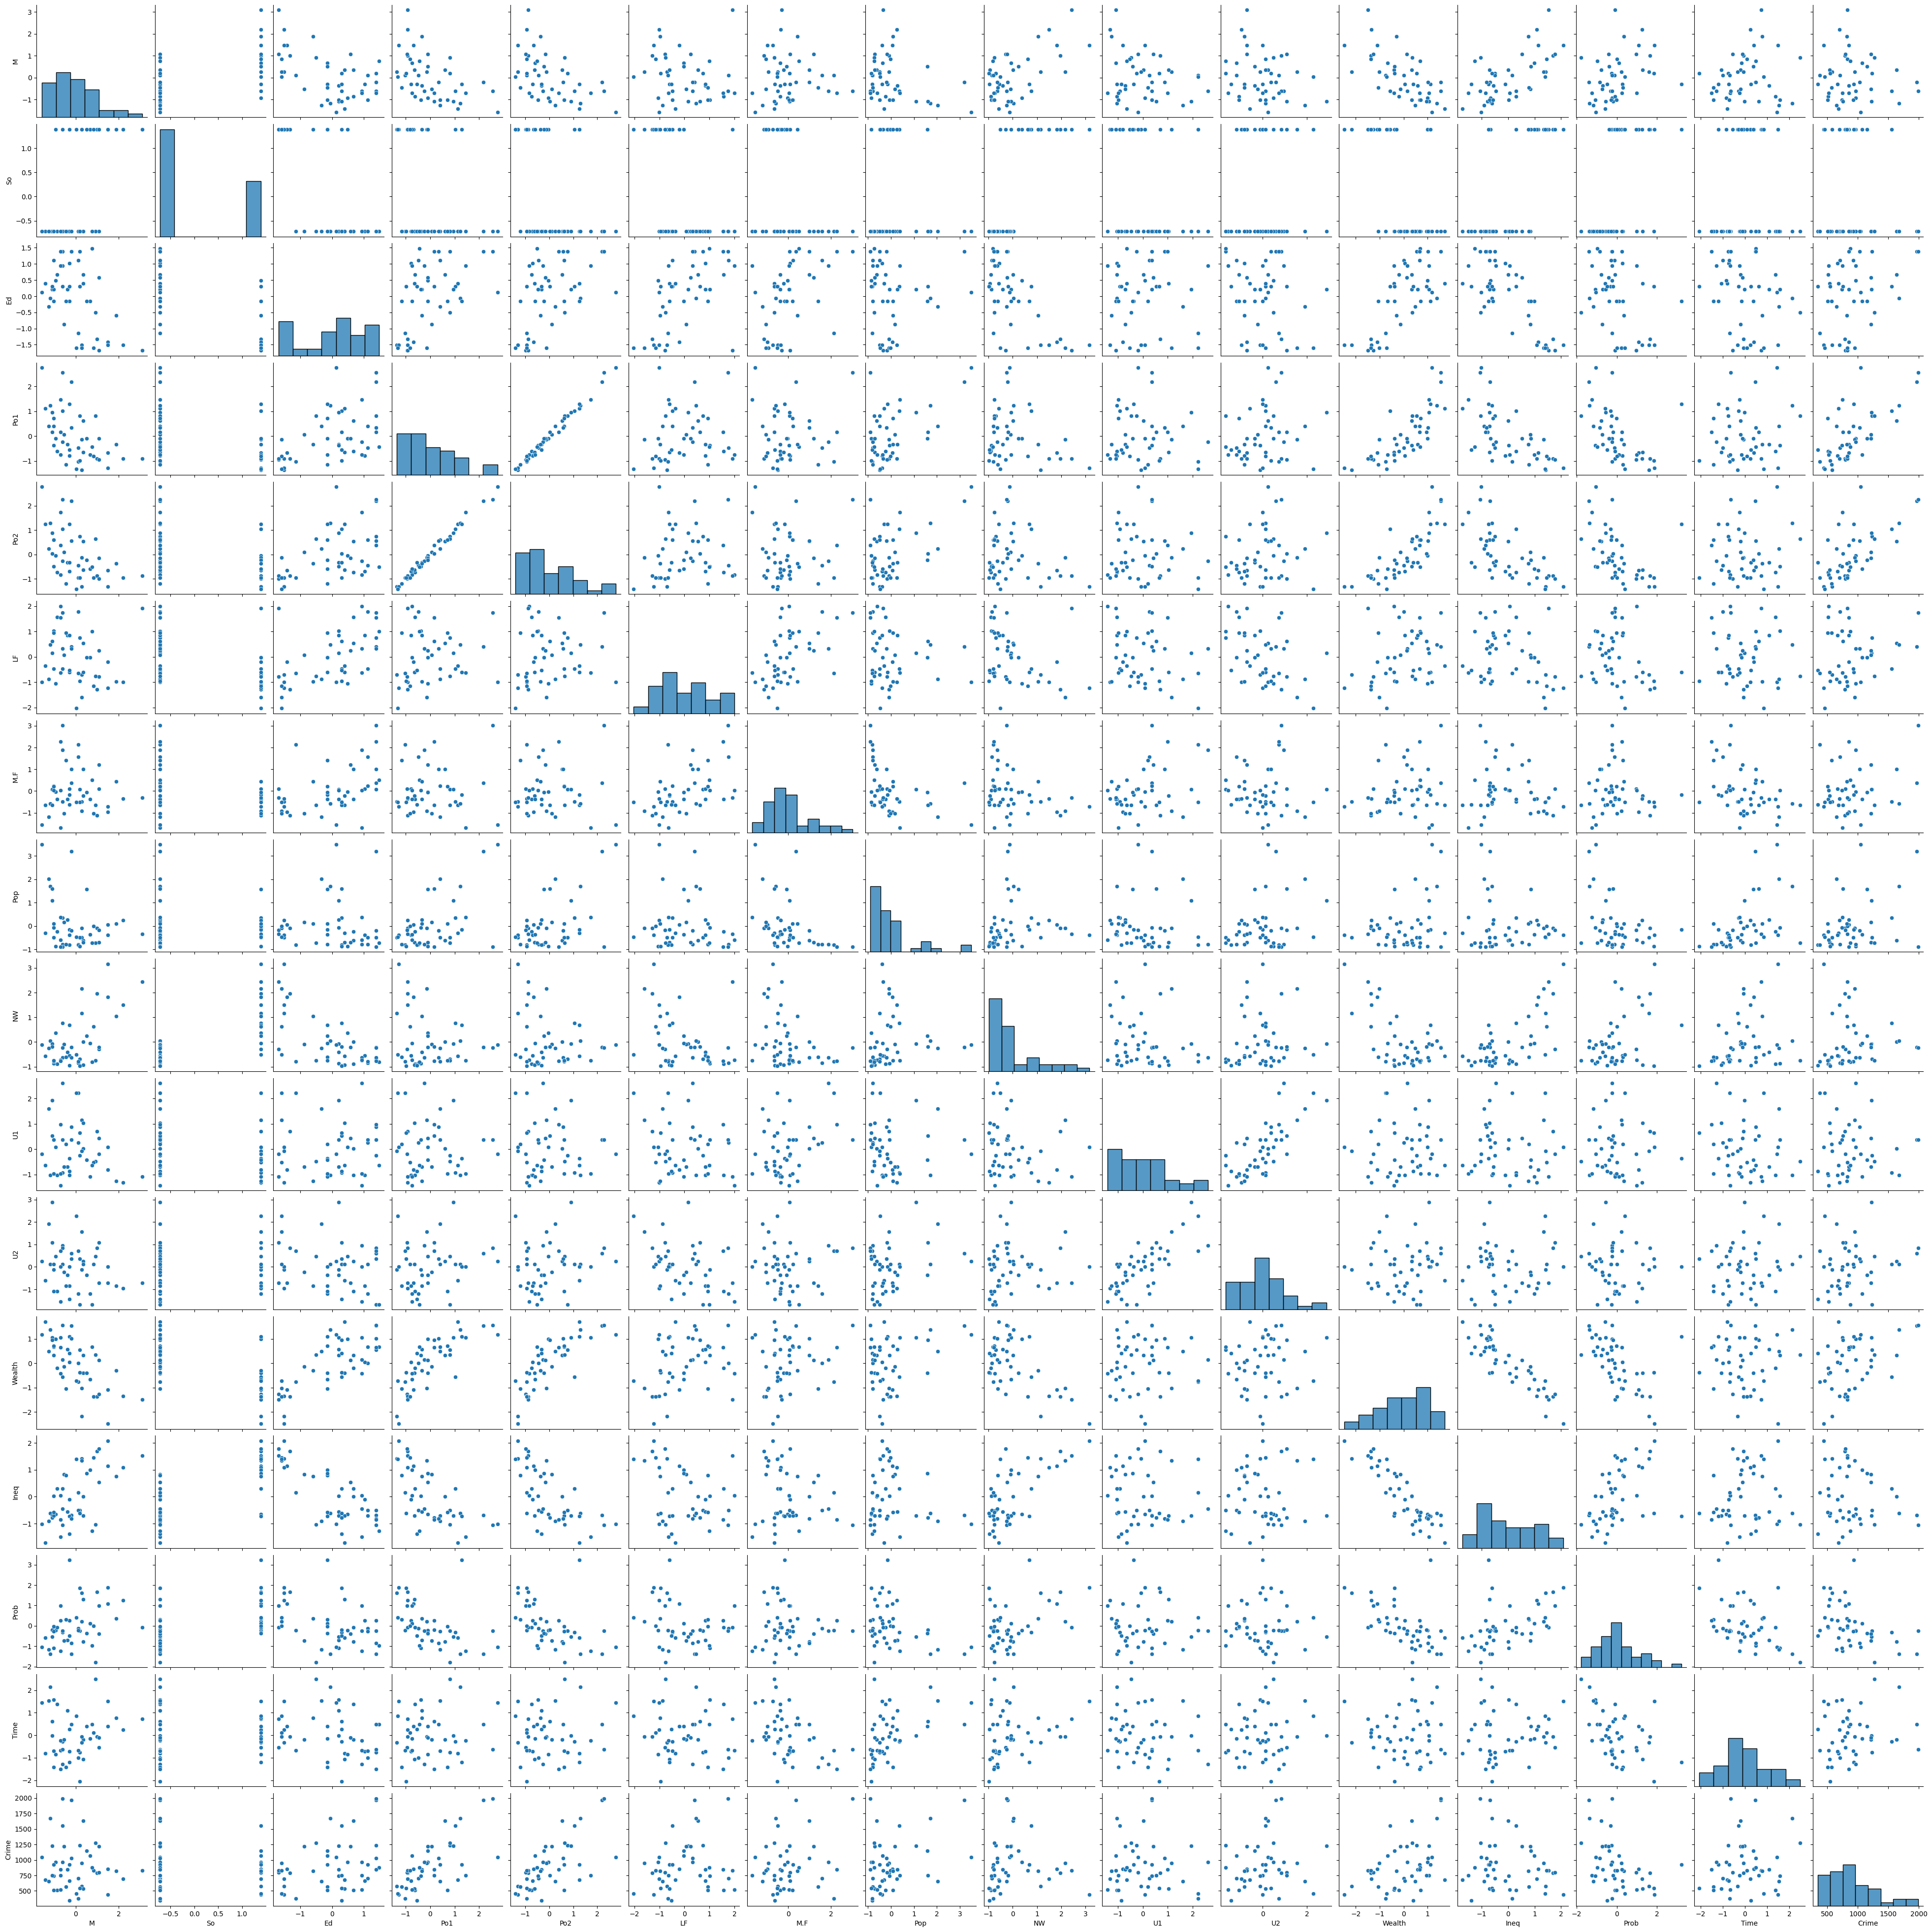

In [8]:

sns.pairplot(dfEDA)
plt.show()

No se visualiza claramente si existe una relaci√≥n lineal o no a trav√©s del diagrama de dispersi√≥n. En ese sentido se realiza el diagrama de correlaci√≥n a fin de validar el tipo de relaci√≥n lineal que existen en el target y las variables predictorias, as√≠ como las variables predictorias en si.

## **4.2 Diagrama de Correlaci√≥n** 

Se realiza el an√°lisis de correlaci√≥n empleando el m√©todo de Pearson.

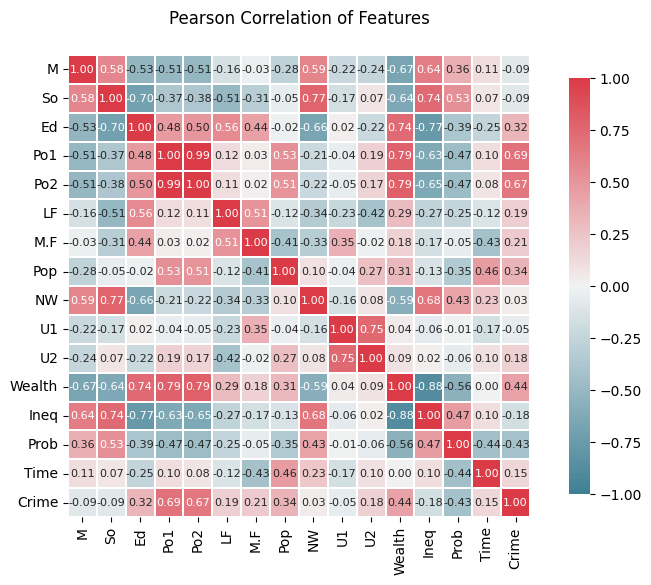

In [9]:
correlation_heatmap(dfEDA)

Teniendo en cuenta los rangos de correlaci√≥n:

La clasificaci√≥n de la fuerza de la correlaci√≥n se basa com√∫nmente en el valor absoluto del coeficiente de correlaci√≥n de Pearson (
ùëü
r). Aunque no hay l√≠mites estrictos universalmente aceptados, aqu√≠ hay una gu√≠a com√∫nmente utilizada:

- Correlaci√≥n muy baja o despreciable: $0‚â§‚à£r‚à£<0.1$
- Correlaci√≥n baja: $0.1‚â§‚à£r‚à£<0.3$
- Correlaci√≥n moderada: $0.3‚â§‚à£r‚à£<0.5$
- Correlaci√≥n alta: $0.5‚â§‚à£r‚à£<0.7$
- Correlaci√≥n muy alta: $0.7‚â§‚à£r‚à£‚â§1.0$

Se obtienen los siguientes insights:

1. Correlaci√≥n entre **Crime** y otras variables:
- Po1 (0.69) y Po2 (0.67): Ambas variables muestran una fuerte correlaci√≥n positiva con **Crime**. Esto sugiere que a medida que los valores de **Po1** y **Po2** aumentan, el valor de **Crime** tambi√©n tiende a aumentar.
- Wealth (0.44): Hay una moderada correlaci√≥n positiva con **Crime**, lo que indica que un mayor nivel de riqueza est√° asociado con un aumento en los cr√≠menes.

2. Variables con baja o negativa correlaci√≥n con **Crime**:
- LF (-0.05), M.F (0.21), Pop (0.34), NW (0.21), U1 (0.03), U2 (0.18), Prob (0.13): Estas variables muestran una correlaci√≥n baja o cercana a cero con Crime, lo que indica que no tienen una relaci√≥n fuerte con la cantidad de cr√≠menes.

3. Correlaci√≥n entre las variables explicativas:
- Po1 y Po2 (0.99): Est√°n casi perfectamente correlacionadas, lo que sugiere que ambas variables est√°n casi linealmente dependientes entre s√≠. Esto puede causar problemas de multicolinealidad en el modelo.
- Wealth y Ineq (0.88): Tienen una correlaci√≥n fuerte positiva, lo que indica que mayor riqueza est√° asociada con mayor desigualdad.
- NW y Ineq (0.77): Muestra una fuerte correlaci√≥n positiva.

4. Multicolinealidad:
- Variables como Po1 y Po2, Wealth e Ineq, y NW e Ineq tienen alta correlaci√≥n entre s√≠, lo que podr√≠a indicar problemas de multicolinealidad. Es importante considerar esto al ajustar el modelo OLS, ya que puede afectar la estabilidad y la interpretaci√≥n de los coeficientes.

5. Conclusiones:
- Las variables Po1, Po2 y Wealth parecen ser importantes predictores de Crime.

La multicolinealidad entre algunas variables puede ser un problema, y es posible que se necesite alg√∫n tipo de regularizaci√≥n (como Ridge o Lasso) o la eliminaci√≥n de variables altamente correlacionadas para obtener un modelo m√°s estable.

**Se debe eliminar**

In [10]:
dfEDA_no_corr=dfEDA.drop(columns=['Po1','Wealth','Ineq','NW'])


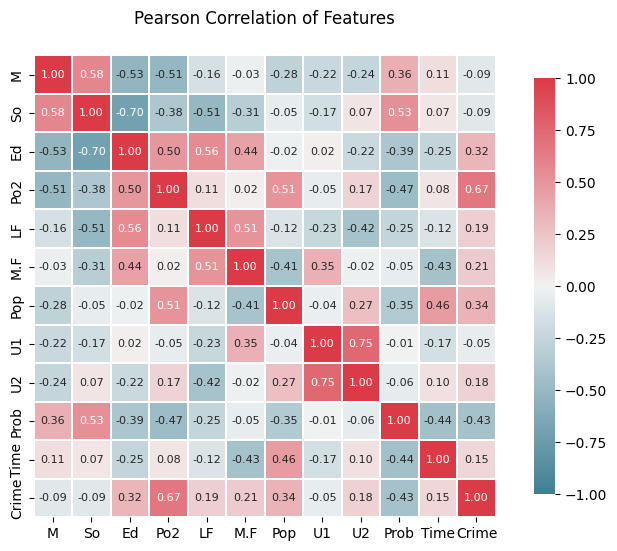

In [11]:
correlation_heatmap(dfEDA_no_corr)

Se retiraron 4 variables a fin de garantizar una menor correlaci√≥n entre las variables predictoras. La correlaci√≥n pas√≥ de ser alta a tener una correlaci√≥n entre baja y moderada.

In [12]:
X_no_corr= X.drop(columns=['Po1','Wealth','Ineq','NW'])

# **5. Pre-procesamiento de datos**

Normalizaci√≥n de los datos

Dado el rango y la naturaleza de las variables proporcionadas, puede ser beneficioso normalizar las variables antes de aplicar la regresi√≥n OLS. A continuaci√≥n se presentan algunos puntos que justifican la normalizaci√≥n:

- Diferentes Escalas: Las variables como $Wealth$, $Pop$, y $Crime$ tienen rangos muy diferentes en comparaci√≥n con variables como $LF$ y $Prob$. La normalizaci√≥n pondr√° todas las variables en una escala similar, mejorando la estabilidad num√©rica y facilitando la interpretaci√≥n de los coeficientes.
- Estabilidad Num√©rica: Las operaciones matriciales involucradas en la regresi√≥n OLS pueden ser m√°s estables num√©ricamente cuando las variables est√°n normalizadas.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_corr)

# **6. Estimaci√≥n de Coeficientes**

En un modelo de Regresi√≥n Lineal la primera columna de unos se utiliza como t√©rmino de intercepto (o bias). Se crea un nuevo conjunto de datos con esta columna

In [14]:
n_samples = X.shape[0]
X_model= np.c_[np.ones(n_samples), X_scaled]
X_model[0:3,:]

array([[ 1.        ,  0.99938191,  1.39194109, -1.32265632, -0.87606884,
        -1.28044059, -1.13271999, -0.09603392,  0.70262087,  0.840356  ,
         1.66759886, -0.05659903],
       [ 1.        ,  0.35594424, -0.71842121,  0.66517309,  0.53379436,
         0.54549111,  0.99404937, -0.62704499,  0.02982262,  0.24192067,
        -0.77765391, -0.18513811],
       [ 1.        ,  0.27551453,  1.39194109, -1.50336809, -1.30987289,
        -0.70514704, -0.48096809, -0.49429222, -0.08231042, -0.11714053,
         1.61420635, -0.32766929]])

## **6.1 Usando OLS**

En este caso se emplea un modelo de Regresi√≥n Lineal empleando el m√©todo de Minimos Cuadrados Ordinarios (OLS)

**Estimaci√≥n OLS:** M√≠nimos cuadrados ordinarios es un estimador utilizado en regresi√≥n lineal para estimar los par√°metros $\beta$ del modelo lineal. El coeficiente estimado est√° representado por $\hat{\beta}$. El objetivo de OLS es minimizar la suma de las diferencias al cuadrado entre la variable dependiente observada $ùë¶_i$ y las predichas por la funci√≥n lineal $h_\beta(i)=X_i\hat{\beta}$

**Funci√≥n objetiva:**
La funci√≥n de costos a minimizar es la suma de los residuos al cuadrado:

$$J(\hat{\beta})=\sum_{i=1}^n (X_i\hat{\beta}-y_i)^2$$

**Derivaci√≥n de las estimaciones de MCO:**
Para encontrar los valores beta estimados $\hat{\beta}$ que minimizan la suma de los residuos al cuadrado, tomamos la derivada de la funci√≥n objetivo con respecto a $\hat{\beta}$ y la establecemos en cero. Esto lleva a las ecuaciones normales.

Las ecuaciones normales son:

$$X^T X\hat{\beta} = X^T Y $$

Resolviendo para $\hat{\beta}$:

$$ \hat{\beta} = (X^T X)^{-1} X^T Y $$

Esta es la derivaci√≥n de la soluci√≥n en forma cerrada para minimizar la suma de residuos cuadrados (SSR) para regresi√≥n lineal simple y m√∫ltiple. Implementando en Python:

In [15]:
betas = np.dot(np.linalg.inv(np.dot(X_model.T, X_model)), np.dot(X_model.T, y))
variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, betas))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

Variable  Coeficiente
0   Intercept   905.085106
1           M   127.987280
2          So   118.927663
3          Ed    94.039082
4         Po1   222.752788
5         Po2    51.934113
6          LF    93.475310
7         M.F    21.630812
8         Pop   -98.451811
9          NW   158.184884
10         U1   -94.851043
11         U2     4.003210

Si valida estos coeficientes con un modelo ajustado usando Linear Regression de scikit-Learn.

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)  # fit_intercept=False ya que X ya incluye el intercepto
lin_reg.fit(X_model, y)
beta_lin_reg = lin_reg.coef_

variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, beta_lin_reg))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

Variable  Coeficiente
0   Intercept   905.085106
1           M   127.987280
2          So   118.927663
3          Ed    94.039082
4         Po1   222.752788
5         Po2    51.934113
6          LF    93.475310
7         M.F    21.630812
8         Pop   -98.451811
9          NW   158.184884
10         U1   -94.851043
11         U2     4.003210

## **6.2 Usando (Stochastic) Gradient Descent - SGD**

SGDRegressor en scikit-learn se refiere a **Stochastic Gradient Descent**, que actualiza los par√°metros del modelo para cada ejemplo de entrenamiento. 

**SGDRegressor**: implementa el descenso de gradiente estoc√°stico para ajustar iterativamente los coeficientes para minimizar la funci√≥n de costo representada por $SSR$ multiplicada con el factor de normalizaci√≥n $(1/2n)$

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(fit_intercept=False,
                       max_iter=1000, 
                       tol=1e-3, 
                       eta0=0.01, 
                       learning_rate='constant')

sgd_reg.fit(X_model, y)
beta_sgd=sgd_reg.coef_

variable_names = ['Intercept'] + dfCrimen.drop(columns=['Crime']).columns.tolist()

coef_dict = dict(zip(variable_names, beta_sgd))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Variable', 'Coeficiente'])
coef_df

Variable  Coeficiente
0   Intercept   898.188050
1           M   118.880213
2          So   123.301100
3          Ed    80.999394
4         Po1   226.750097
5         Po2    50.401627
6          LF    95.825982
7         M.F    15.401578
8         Pop   -80.778933
9          NW   131.160197
10         U1   -89.841990
11         U2     8.010972

Se observan que los coeficientes son diferentes empleando SGD.

Veamos la medici√≥n de cada modelo.

# **7. Evaluaci√≥n**

## 7.1 M√©tricas de Error

In [18]:
# OLS
y_pred_lr = lin_reg.predict(X_model)

from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred_lr)))

MAE: 165.65770973113786
MSE: 43895.05542319519
RMSE: 209.51146847653754


In [19]:
# SGD
y_pred_sgd = sgd_reg.predict(X_model)
                                    
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y, y_pred_sgd))
print('MSE:', metrics.mean_squared_error(y, y_pred_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred_sgd)))

MAE: 166.1310352861146
MSE: 44272.95565340722
RMSE: 210.41139620611622


Se realiza la interpretaci√≥n de las m√©tricas:

1. MAE (Mean Absolute Error):

- Es la media de los valores absolutos de los errores entre las predicciones y los valores reales.
- Un MAE m√°s bajo indica que, en promedio, las predicciones del modelo est√°n m√°s cerca de los valores reales. En este caso, el modelo OLS tiene un MAE m√°s bajo (209.511) en comparaci√≥n con el modelo SGD (166.37), lo que sugiere que OLS tiene errores absolutos m√°s peque√±os en promedio.

2. MSE (Mean Squared Error):

- Es la media de los cuadrados de los errores entre las predicciones y los valores reales.
- Un MSE m√°s bajo indica que el modelo tiene errores menores y m√°s consistentes. Los errores grandes tienen un impacto mayor debido al cuadrado de los errores. Aqu√≠, el modelo OLS tiene un MSE m√°s bajo (43895.055) en comparaci√≥n con el modelo SGD (44647.29), lo que indica que OLS tiene errores m√°s peque√±os y consistentes.

3. RMSE (Root Mean Squared Error):
- Es la ra√≠z cuadrada del MSE y representa la magnitud del error de una manera que es interpretable en las mismas unidades que los valores reales.
- Similar al MSE, un RMSE m√°s bajo indica un mejor ajuste del modelo. El modelo OLS tiene un RMSE m√°s bajo (209.511) en comparaci√≥n con el modelo SGD (211.299), lo que sugiere que OLS tiene un mejor ajuste en t√©rminos de la magnitud de los errores.

Conclusi√≥n:
Comparando las m√©tricas de error para ambos modelos, el modelo OLS muestra un mejor desempe√±o que el modelo SGD. Tiene valores m√°s bajos en MAE, MSE y RMSE. Esto indica que el modelo OLS produce predicciones m√°s precisas y consistentes con respecto a los valores reales de la tasa de criminalidad.

## 7.2 M√©tricas de Bondad de Ajuste


Ahora queremos alguna forma de indicar qu√© tan estrechamente asociados est√°n $X_i$ y $Y$, o qu√© parte de la variaci√≥n de $Y se "explica" por la variaci√≥n de $X_i$. Realizamos un an√°lisis de varianza y eso nos lleva a las siguientes medidas de bondas de ajuste:

- **R2** mide la proporci√≥n de varianza en la variable dependiente que es predecible a partir de las variables independientes. Var√≠a de 0 a 1, y los valores m√°s altos indican un mejor poder explicativo.
- **R2-ajustado** ajusta el valor de R cuadrado para el n√∫mero de predictores en el modelo. Tiene en cuenta la complejidad del modelo y es m√°s informativo al comparar modelos con diferentes n√∫meros de predictores.


Calculemos estos valores para el modelo estimado con OLS.

In [20]:
import statsmodels.api as sm

model_lr_ols_stats = sm.OLS(y, X_model).fit()

# R-squared
r_squared = model_lr_ols_stats.rsquared
print("R-squared:", r_squared)

# Adjusted R-squared
adj_r_squared = model_lr_ols_stats.rsquared_adj
print("Adjusted R-squared:", adj_r_squared)

R-squared: 0.7001759490932129
Adjusted R-squared: 0.605945533093937


Interpretaci√≥n:
- Un **R2** de 0.70 indica que el 70% de la variabilidad en la tasa de criminalidad puede ser explicada por las variables predictoras. Esto sugiere que el modelo tiene un buen ajuste y es capaz de explicar una gran parte de la variabilidad en los datos.
- Un **R2-Ajustado** de 0.60 indica que, al tener en cuenta el n√∫mero de predictores en el modelo, aproximadamente el 60.5% de la variabilidad en la tasa de criminalidad puede ser explicada por el modelo. El **R2-ajustado** es ligeramente menor que el **R2**, lo que es esperado ya que penaliza por el n√∫mero de variables en el modelo.

## 7.3 Test de Significancia

Para este caso se usa el t-test y F-test:
- test-t eval√∫a si cada coeficiente ($ùõΩ_i$) es significativamente diferente de cero (hip√≥tesis nula $ùêª_0$). Esto ayuda a determinar la importancia de cada predictor.
- test-F eval√∫a la significancia general del modelo de regresi√≥n. Prueba si al menos un predictor est√° significativamente relacionado con la variable de respuesta.

In [21]:
X.columns

Index(['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2', 'Wealth', 'Ineq', 'Prob', 'Time'], dtype='object')

In [22]:
# Obtener los resultados del t-test y F-test
t_values = model_lr_ols_stats.tvalues
p_values = model_lr_ols_stats.pvalues
f_statistic = model_lr_ols_stats.fvalue
f_p_value = model_lr_ols_stats.f_pvalue

variable_names = ['Intercept'] + ['M', 'So', 'Ed', 'Po2', 'LF', 'M.F', 'Pop', 'U1', 'U2', 'Prob', 'Time']
results_df = pd.DataFrame({
    'Variable': variable_names,
    'Coefficient': model_lr_ols_stats.params,
    't_value': t_values,
    'p_value': p_values
})

results_df['F-statistic'] = f_statistic
results_df['F-p_value'] = f_p_value

# Mostrar el DataFrame
results_df

Variable  Coefficient    t_value       p_value  F-statistic  F-p_value
const  Intercept   905.085106  25.557339  3.154595e-24     7.430466   0.000002
x1             M   127.987280   2.301827  2.741330e-02     7.430466   0.000002
x2            So   118.927663   1.821846  7.703348e-02     7.430466   0.000002
x3            Ed    94.039082   1.370873  1.791419e-01     7.430466   0.000002
x4           Po2   222.752788   3.514691  1.237389e-03     7.430466   0.000002
x5            LF    51.934113   0.848200  4.020903e-01     7.430466   0.000002
x6           M.F    93.475310   1.430821  1.613499e-01     7.430466   0.000002
x7           Pop    21.630812   0.398482  6.926958e-01     7.430466   0.000002
x8            U1   -98.451811  -1.160989  2.535040e-01     7.430466   0.000002
x9            U2   158.184884   2.019945  5.109590e-02     7.430466   0.000002
x10         Prob   -94.851043  -1.733891  9.173936e-02     7.430466   0.000002
x11         Time     4.003210   0.074755  9.408351e-01     7.430466   0.000002

In [23]:
# Otra forma
model_lr_ols_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7.430
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           2.24e-06
Time:                        06:05:44   Log-Likelihood:                -317.89
No. Observations:                  47   AIC:                             659.8
Df Residuals:                      35   BIC:                             682.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        905.0851     35.414     25.557      0.000     833.191     976.979
x1           127.9873     55.602      2.302      0.027      15.108     240.866
x2           118.9277     65.279      1.822      0.077     -13.595     251.450
x3            94.0391     68.598      1.371      0.179     -45.222     233.300
x4           222.7528     63.378      3.515      0.001      94.089     351.416
x5            51.9341     61.229      0.848      0.402     -72.367     176.235
x6            93.4753     65.330      1.431      0.161     -39.151     226.102
x7            21.6308     54.283      0.398      0.693     -88.570     131.831
x8           -98.4518     84.800     -1.161      0.254    -270.605      73.701
x9           158.1849     78.311      2.020      0.051      -0.796     317.166
x10          -94.8510     54.704     -1.734      0.092    -205.906      16.204
x11            4.0032     53.551      0.075      0.941    -104.711     112.717
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.134
Skew:                           0.129   Prob(JB):                        0.935
Kurtosis:                       2.959   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretaci√≥n:

$t-test$

Para realizar el an√°lsis t-test tomaremos tres variables:  **Po2**, **LF** y **U2**. He tomado estas variables ya que en el diagrama de correlaci√≥n la primera presenta altos valores de correlaci√≥n y las dos √∫ltimas bajos valores de correlaci√≥n con el target. Veamos su siginificancia con la prueba-t.

- Coeficiente para beta_Po2: 222.752788 con $p-value$ :0.001
- Coeficiente para beta_LF: 51.934113 con $p-value$: 0.402
- Coeficiente para beta_U2: 158.184884 con $p-value$: 0.051

Tipicamente, si **p-value ‚â§ 0.05**, we reject $ùêª_0$. En este caso:

Variable $Po2$
- Interpretaci√≥n del Coeficiente: Este coeficiente indica que, manteniendo todas las dem√°s variables constantes, un aumento de una unidad en el gasto per c√°pita en protecci√≥n policial en 1959 se asocia con un aumento de 222.752788 unidades en la tasa de criminalidad.
- Significancia: El p-value 0.001 es menor que 0.05, por lo que se rechaza la hip√≥tesis nula de que el coeficiente de Po2 es cero. Esto sugiere que Po2 es estad√≠sticamente significativo al nivel del 5%.

Variable $LF$
- Interpretaci√≥n del Coeficiente: Este coeficiente indica que, manteniendo todas las dem√°s variables constantes, un aumento de una unidad en la tasa de participaci√≥n en la fuerza laboral de varones urbanos civiles de 14-24 a√±os se asocia con un aumento de 51.934113 unidades en la tasa de criminalidad.
- Significancia: El p-value de 0.402 es mayor que 0.05, por lo que NO se puede rechazar la hip√≥tesis nula de que el coeficiente de LF es cero. Esto sugiere que LF no es estad√≠sticamente significativo al nivel del 5%.

Variable $U2$
- Interpretaci√≥n del Coeficiente: Este coeficiente indica que, manteniendo todas las dem√°s variables constantes, un aumento de una unidad en la tasa de desempleo de varones urbanos de 35-39 a√±os se asocia con un aumento de 158.184884 unidades en la tasa de criminalidad.
- Significancia: El p-value 0.051 es ligeramente mayor que 0.05, por lo que, estrictamente hablando, no se puede rechazar la hip√≥tesis nula de que el coeficiente de U2 es cero al nivel del 5%. Sin embargo, es muy cercano al umbral de significancia, lo que sugiere que U2 podr√≠a tener una relaci√≥n con la tasa de criminalidad que vale la pena explorar m√°s a fondo.

$F-test$

Decision: Tipicamente, si **p-value ‚â§0.05**, se rechaza $ùêª_0$. Indicando que el modelo general es estad√≠sticamente significativo

Para nuestro caso: $F-statistic:$ 7.430466, $p-value:$ 0.000002

La prueba-F y su p-value sugieren que el modelo en su conjunto es significativo. El p-value del F-test es muy peque√±o $0.000002‚â§0.05$, lo que indica que al menos una de las variables explicativas tiene un coeficiente distinto de cero al nivel del 5%. Esto respalda la validez general del modelo a pesar de que algunas variables individuales no sean significativas.

# 8. Predicci√≥n

Como parte del an√°lisis se resuelve:

Predecir la tasa de crimen en un estado con las siguientes caracter√≠sticas:

- M = 14.0
- So = 0
- Ed = 10.0
- Po1 = 12.0
- Po2 = 15.5
- LF = 0.640
- M.F = 94.0
- Pop = 150
- NW = 1.1
- U1 = 0.120
- U2 = 3.6
- Wealth = 3200
- Ineq = 20.1
- Prob = 0.04
- Time = 39.0

Crear DataFrame a partir de las caracter√≠sticas del nuevo estado

In [24]:
new_state = {
    'M': 14.0,
    'So': 0,
    'Ed': 10.0,
    'Po1': 12.0,
    'Po2': 15.5,
    'LF': 0.640,
    'M.F': 94.0,
    'Pop': 150,
    'NW': 1.1,
    'U1': 0.120,
    'U2': 3.6,
    'Wealth': 3200,
    'Ineq': 20.1,
    'Prob': 0.04,
    'Time': 39.0
}

new_state_df = pd.DataFrame([new_state])


In [25]:
new_state_df_no_corr=new_state_df.drop(columns=['Po1','Wealth','Ineq','NW'])

Normalizar las nuevas caracter√≠sticas usando el mismo scaler

In [26]:
new_state_scaled = scaler.transform(new_state_df_no_corr)
new_state_scaled

array([[ 0.11465512, -0.71842121, -0.50945338,  2.70281465,  1.9712186 ,
        -1.4757473 ,  3.01038088,  1.37541913,  0.24192067, -0.3152596 ,
         1.7689212 ]])

A√±adir una columna de unos para el t√©rmino de intercepto

In [27]:
new_state_scaled_with_intercept = np.c_[np.ones(1), new_state_scaled]
new_state_scaled_with_intercept

array([[ 1.        ,  0.11465512, -0.71842121, -0.50945338,  2.70281465,
         1.9712186 , -1.4757473 ,  3.01038088,  1.37541913,  0.24192067,
        -0.3152596 ,  1.7689212 ]])

Predecir la tasa de crimen para el nuevo estado

In [28]:
predicted_crime_rate = lin_reg.predict(new_state_scaled_with_intercept)
print("Tasa de Criminalidad Predecido:", predicted_crime_rate[0])

Tasa de Criminalidad Predecido: 1357.8546078327558


In [29]:
predicted_crime_rate = model_lr_ols_stats.predict(new_state_scaled_with_intercept)
print("Tasa de Criminalidad Predecido:", predicted_crime_rate[0])

Tasa de Criminalidad Predecido: 1357.8546078327563


# Consideraciones

La interpretaci√≥n de los coeficientes en un modelo de regresi√≥n debe hacerse con cautela, especialmente cuando se trata de relaciones complejas como las que involucran tasas de criminalidad y gasto en protecci√≥n policial. Aunque el coeficiente positivo de Po2 (gasto per c√°pita en protecci√≥n policial en 1959) indica que un aumento en este gasto se asocia con un aumento en la tasa de criminalidad, esto no necesariamente implica causalidad. Aqu√≠ hay algunas posibles explicaciones para esta observaci√≥n:

- Causalidad inversa: Es posible que los estados con tasas de criminalidad m√°s altas gasten m√°s en protecci√≥n policial en un intento de reducir la criminalidad. En este caso, la alta criminalidad podr√≠a haber llevado a un mayor gasto en protecci√≥n policial, en lugar de que el gasto en protecci√≥n policial cause un aumento en la criminalidad.

- Variables omitidas: Pueden existir variables no incluidas en el modelo que influyen tanto en el gasto en protecci√≥n policial como en la tasa de criminalidad. Por ejemplo, factores socioecon√≥micos, niveles de pobreza, educaci√≥n y desempleo pueden influir en ambos.

- Tiempo de respuesta: El gasto en protecci√≥n policial puede no tener un efecto inmediato en la reducci√≥n de la criminalidad. Los beneficios de un mayor gasto en protecci√≥n policial podr√≠an no manifestarse hasta despu√©s de alg√∫n tiempo, mientras que el modelo analiza datos en un solo punto en el tiempo o con un desfase temporal inadecuado.

- Medidas reactivas: Los estados pueden aumentar el gasto en protecci√≥n policial como una medida reactiva en respuesta a un aumento en la criminalidad. Por lo tanto, el aumento en el gasto es una consecuencia de la criminalidad existente, no una causa de la misma.

- Ineficiencia: No todo el gasto en protecci√≥n policial se traduce necesariamente en una reducci√≥n de la criminalidad. Factores como la eficiencia del gasto, la corrupci√≥n, la formaci√≥n del personal y la implementaci√≥n de pol√≠ticas efectivas pueden influir en la efectividad del gasto en protecci√≥n policial.

Se analiza cada variable propuesta:

Po2:
- Conclusi√≥n: Aunque el coeficiente de Po2 es significativo y positivo, sugiriendo una asociaci√≥n entre mayor gasto en protecci√≥n policial y mayores tasas de criminalidad, esta relaci√≥n probablemente refleja causalidad inversa o factores omitidos m√°s que una verdadera - causalidad directa. **La interpretaci√≥n debe ser que los estados con alta criminalidad tienden a gastar m√°s en protecci√≥n policial.**

LF:
- Conclusi√≥n: La tasa de participaci√≥n en la fuerza laboral de varones urbanos civiles de 14-24 a√±os no muestra una relaci√≥n significativa con la tasa de criminalidad, lo que sugiere que esta variable no es un predictor fuerte de la criminalidad en el modelo actual.

U2:
- Conclusi√≥n: La tasa de desempleo de varones urbanos de 35-39 a√±os tiene un valor p cercano al umbral de significancia, lo que sugiere que podr√≠a tener una relaci√≥n con la criminalidad que vale la pena investigar m√°s a fondo. Aunque no es estad√≠sticamente significativa al nivel del 5%, la relaci√≥n podr√≠a ser m√°s clara con un an√°lisis adicional o un mayor tama√±o de muestra.